
Laboratory Exercise #2 Lab Exercise 2: Preprocessing Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In this exercise, you will load the loans.csv dataset into a pandas dataframe and perform a train/test split. Provide the following requirements to complete this exercise:


1.Using the Colab notebook, import the following packages/ libraries/ modules:
OS



*   OS


*   Numpy

*   Pendas
*   Matplotlib


*   Seaborn


*   Warnings (to suppress warnings)









In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

2. Import and load the dataset. Set the client_id as the index.

In [5]:
path = "/content/drive/MyDrive/ITBAN3/loans.csv"
df = pd.read_csv(path)
df.set_index('client_id', inplace=True)

3. Display the contents of the dataset by showing its first 5 rows.

In [6]:
df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


4. Check the info of the dataset and the datatypes for each columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


5. Determine whether the dataset has missing values.

In [8]:
missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


6. Check if there is a presence of outliers using Boxplot.

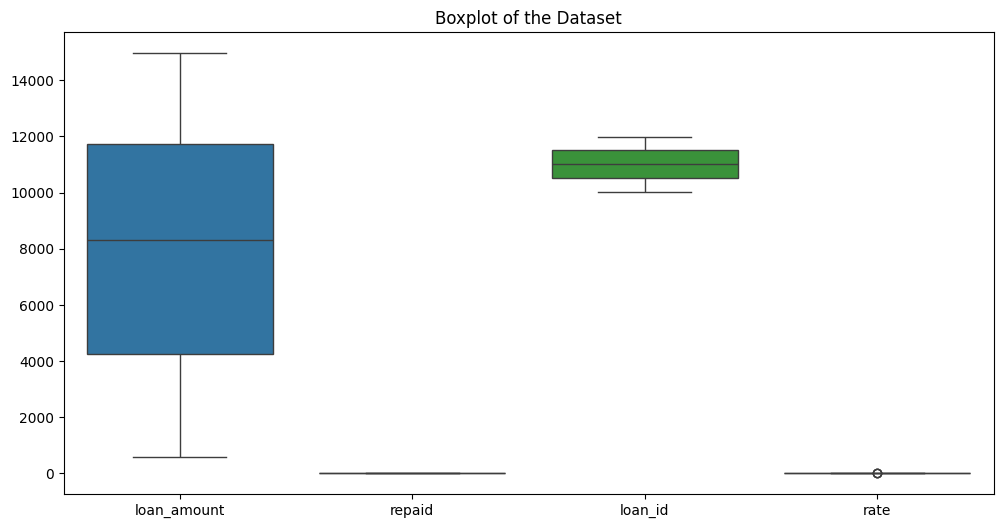

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)

plt.title('Boxplot of the Dataset')
plt.show()

7. If there are a presence of outliers, do the following and explain the results:

a. Treat them using SQRT transformation

b. Treat them using the capping approach: Z-Score.

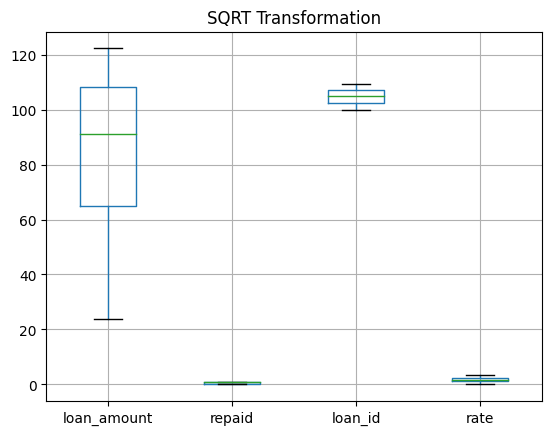

In [10]:
df_sqrt_transformed = df.copy()
numerical_cols = df_sqrt_transformed.select_dtypes(include=[np.number]).columns
df_sqrt_transformed[numerical_cols] = np.sqrt(df_sqrt_transformed[numerical_cols])

df_sqrt_transformed.boxplot()
plt.title('SQRT Transformation')
plt.show()

In [11]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
df_z_capped = df[(z_scores < threshold).all(axis=1)]

print('Capping Approach: Z-Score')
print()
print(f"Number of rows before capping: {df.shape[0]}")
print(f"Number of rows after capping: {df_z_capped.shape[0]}")

Capping Approach: Z-Score

Number of rows before capping: 443
Number of rows after capping: 440


8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

In [12]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,0.909867,0.0,0.118063,2002-04-16,2003-12-20,0.169707
46109,credit,0.640785,0.0,0.491927,2003-10-21,2005-07-17,0.098335
46109,home,0.844782,1.0,0.494955,2006-02-01,2007-07-05,0.053132
46109,cash,0.829795,1.0,0.296165,2010-12-08,2013-05-05,0.097542
46109,credit,0.936026,1.0,0.709384,2010-07-07,2012-05-21,0.247423


In [ ]:
from scipy.stats import skew, kurtosis

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Skewness: {round(skew(df["loan_amount"]), 2)}')

# Kurtosis
plt.subplot(1, 2, 2)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Kurtosis: {round(kurtosis(df["loan_amount"]), 2)}')

# Displaying the plots
plt.show()

9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head(5)

,loan_amount,repaid,loan_id,rate,loan_type_credit,loan_type_home,loan_type_other,loan_start_2000-03-06,loan_start_2000-03-08,loan_start_2000-03-25,...,loan_end_2016-11-14,loan_end_2016-11-27,loan_end_2016-12-10,loan_end_2016-12-29,loan_end_2017-01-16,loan_end_2017-01-19,loan_end_2017-01-26,loan_end_2017-01-29,loan_end_2017-02-15,loan_end_2017-05-07
client_id,,,,,,,,,,,,,,,,,,,,,
46109,0.909867,0.0,0.118063,0.169707,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.640785,0.0,0.491927,0.098335,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.844782,1.0,0.494955,0.053132,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.829795,1.0,0.296165,0.097542,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,0.936026,1.0,0.709384,0.247423,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

df.head(5)


11. Split the data into training and test sets with 80-20 division.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['loan_amount'], axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("\nShapes of training and test sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of training and test sets:
X_train shape: (354, 6)
X_test shape: (89, 6)
y_train shape: (354,)
y_test shape: (89,)
